Найкраще значення K: 1
Точність класифікації при K=1: 0.98


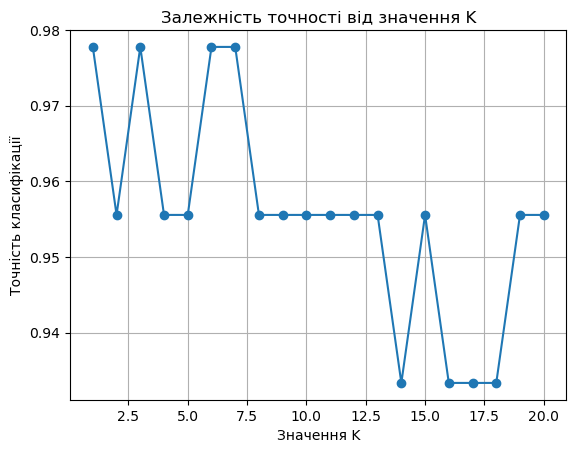

In [1]:
# Імпорт бібліотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Завантаження даних
data = pd.read_csv("IrisData_full.csv", header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# 2. Перемішування записів у базі
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# 3. Нормалізація параметрів квітів
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(columns=['species']))
y = data['species']

# 4. Розділення на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Навчання KNN-класифікатора з різними значеннями К
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# 6. Вибір оптимального значення К
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Найкраще значення K: {best_k}")
print(f"Точність класифікації при K={best_k}: {best_accuracy:.2f}")

# Побудова графіку залежності точності від значення K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Значення K')
plt.ylabel('Точність класифікації')
plt.title('Залежність точності від значення K')
plt.grid()
plt.show()
